<a href="https://colab.research.google.com/github/jewelrana77/Convolutional-Neural-Network/blob/main/nextwordprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install numpy
!pip -q install tensorflow
!pip -q install keras
!pip -q install nltk

import numpy as np
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq



In [ ]:
path = '/content/winter_bd.txt'
text = open(path).read().lower()
print('corpus length:', len(text))

corpus length: 4724


In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)


In [ ]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [ ]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['here', 'is', 'a', '500', 'sentence']
text


In [ ]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [ ]:
print(X[0][0])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Activation
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential, load_model

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [ ]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=10, shuffle=True).history

Epoch 1/10
7/7 [==============================] - 2s 88ms/step - loss: 5.7137 - accuracy: 0.0350 - val_loss: 5.6949 - val_accuracy: 0.1463
Epoch 2/10
7/7 [==============================] - 0s 13ms/step - loss: 5.6898 - accuracy: 0.0804 - val_loss: 5.6793 - val_accuracy: 0.1463
Epoch 3/10
7/7 [==============================] - 0s 12ms/step - loss: 5.6668 - accuracy: 0.0804 - val_loss: 5.6546 - val_accuracy: 0.1463
Epoch 4/10
7/7 [==============================] - 0s 9ms/step - loss: 5.6311 - accuracy: 0.0791 - val_loss: 5.6081 - val_accuracy: 0.1220
Epoch 5/10
7/7 [==============================] - 0s 10ms/step - loss: 5.5620 - accuracy: 0.0791 - val_loss: 5.4981 - val_accuracy: 0.1220
Epoch 6/10
7/7 [==============================] - 0s 9ms/step - loss: 5.4035 - accuracy: 0.0791 - val_loss: 5.2287 - val_accuracy: 0.1220
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 5.1105 - accuracy: 0.0791 - val_loss: 5.0142 - val_accuracy: 0.1220
Epoch 8/10
7/7 [=============

In [ ]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

In [ ]:
history

{'loss': [5.71371603012085,
  5.68979024887085,
  5.666789531707764,
  5.631115436553955,
  5.561996936798096,
  5.4034624099731445,
  5.110507965087891,
  4.949674606323242,
  4.905243873596191,
  4.887333393096924],
 'accuracy': [0.03501945361495018,
  0.08041504770517349,
  0.08041504770517349,
  0.0791180282831192,
  0.0791180282831192,
  0.0791180282831192,
  0.0791180282831192,
  0.0791180282831192,
  0.0791180282831192,
  0.0791180282831192],
 'val_loss': [5.694889545440674,
  5.679320335388184,
  5.654628753662109,
  5.6081037521362305,
  5.498111724853516,
  5.22870397567749,
  5.014230728149414,
  4.970695495605469,
  4.995234966278076,
  5.001532554626465],
 'val_accuracy': [0.1463414579629898,
  0.1463414579629898,
  0.1463414579629898,
  0.12195122241973877,
  0.12195122241973877,
  0.12195122241973877,
  0.12195122241973877,
  0.12195122241973877,
  0.12195122241973877,
  0.12195122241973877]}

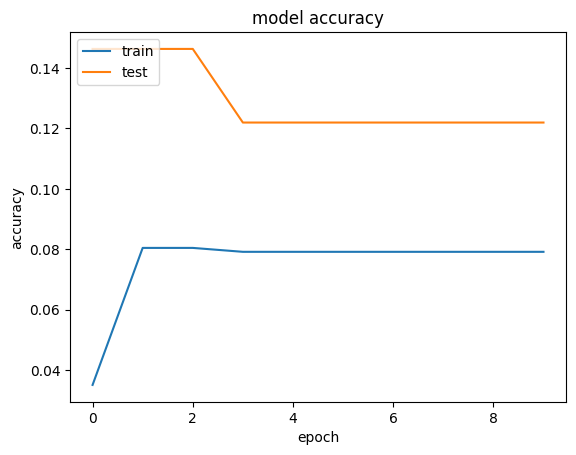

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

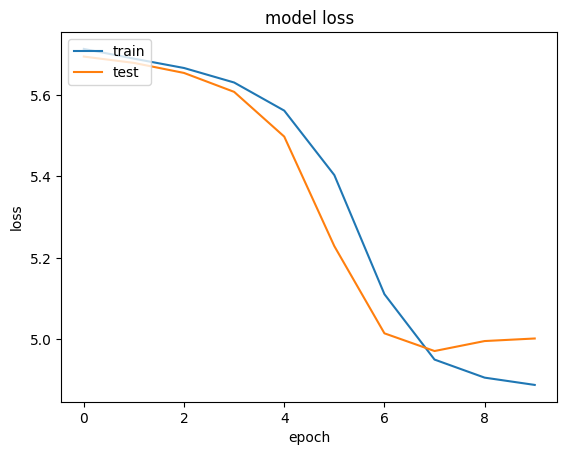

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("The winter season in Bangladesh".lower())


the
winter
season
in
bangladesh


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [ ]:

def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

In [ ]:
 for i in range(5):
      q = input("Enter your sentence: ")
      print("Correct sentence: ",q)
      seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
      print("Sequence: ",seq)
      print("Next possible words: ", predict_completions(seq, 5))
